In [1]:
import numpy as np
from pandas import DataFrame as df

### Load the list with class labels

In [2]:
from utils import load_dataset
_, class_list = load_dataset('train')  # dataset is not in correct (tf) format

### Load validation set in tensorflow format

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
validation_ds = image_dataset_from_directory(
    '../robot-or-brain-data/robot-or-brain-data/images_by_class/validation',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=0,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 375 files belonging to 8 classes.


In [4]:
trues = [class_list[int(y)] for _x, y in validation_ds.unbatch()]

### Print class counts for each split

In [5]:
df([y for y in trues]).value_counts()

None of the above                  168
Collaborative or Interactive AI     85
Acting or Performing machine        50
Complex AI                          35
Thinking machine                    25
Mysterious AI                        8
Learning or recognition machine      2
Superior human                       2
dtype: int64

Some of these counts are horrible. The number of examples in 'Learning or recognition machine', 'Superior human' and 'Mysterious AI' are really too small. Also, the 'None of the above' class is very large, although that's not really a problem.

### Load our trained model

In [6]:
import tensorflow as tf
model = tf.keras.models.load_model('fine_tuned_model')

### Make predictions

In [7]:
logits = model.predict(validation_ds)
predicted = [class_list[v] for v in np.argmax(logits, 1)]
from pandas import DataFrame as df
print(df(predicted).value_counts())
print(df(trues).value_counts())

12/12 [==============================] - 16s 1s/step
Acting or Performing machine       126
None of the above                  117
Complex AI                          94
Mysterious AI                       34
Collaborative or Interactive AI      2
Learning or recognition machine      1
Thinking machine                     1
dtype: int64
None of the above                  168
Collaborative or Interactive AI     85
Acting or Performing machine        50
Complex AI                          35
Thinking machine                    25
Mysterious AI                        8
Learning or recognition machine      2
Superior human                       2
dtype: int64


### Performance metrics for clip based classifier

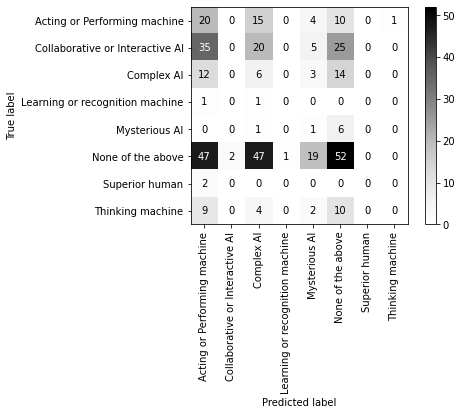

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(trues, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,                               display_labels=class_list)
_ = disp.plot(cmap='Greys', xticks_rotation='vertical')


In [9]:
from utils import print_performance_metrics

print_performance_metrics(trues, predicted, class_list)


accuracy_score 0.21066666666666667
recall_score [0.4        0.         0.17142857 0.         0.125      0.30952381
 0.         0.        ]
precision_score [0.15873016 0.         0.06382979 0.         0.02941176 0.44444444
 0.         0.        ]
f1_score [0.22727273 0.         0.09302326 0.         0.04761905 0.36491228
 0.         0.        ]
krippendorff.alpha 0.05811347882947071


C:\Users\ChristiaanMeijer\anaconda3\envs\robot\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
